In [1]:
import requests   

from bs4 import BeautifulSoup  

import pandas as pd  

import re 

import nltk 

from nltk.tokenize import word_tokenize 

from nltk.corpus import stopwords 

from nltk.stem import PorterStemmer, WordNetLemmatizer 

from wordcloud import wordcloud 


In [2]:
import pandas as pd
df=pd.read_csv('microsoft_tweets.csv')
df

,Unnamed: 0,date,id,content,username
0,0,2023-03-17 19:12:57+00:00,1636807854354227200,Новий #Microsoft #Bing працює на базі штучного...,GizchinaUkraine
1,1,2023-03-17 19:12:09+00:00,1636807654138888205,Xbox Series S at our San Jose Location\n\n #ga...,VideoGameRescue
2,2,2023-03-17 19:12:04+00:00,1636807630843723782,Mal an die #Xbox Leute.\nHabt ihr das auch - e...,truepl4y
3,3,2023-03-17 19:10:31+00:00,1636807242551795712,Hey! Are you thinking about a career in techno...,_dileepabandara
4,4,2023-03-17 19:09:28+00:00,1636806977211846656,#Edge poderá integrar carteira de #criptomoeda...,TugaTech
...,...,...,...,...,...
97,97,2023-03-17 17:57:24+00:00,1636788843386142721,To create designs and visuals you can use #Mic...,liviusa
98,98,2023-03-17 17:55:00+00:00,1636788238005452800,Learn about best practices for #identityandacc...,Steeves_Assocs
99,99,2023-03-17 17:54:00+00:00,1636787984824700928,۲. شرکت #Microsoft هم که ید طولایی تو استفاده ...,miladshahbaba
100,100,2023-03-17 17:51:15+00:00,1636787291787259904,#Microsoft #aitechnology #MicrosoftAI\nhttps:/...,canadianjacs


In [3]:
def print_plot(index):
    example = df[df.index == index][['content']].values[0]
    if len(example) > 0:
        print(example[0])

In [4]:
print_plot(1)

Xbox Series S at our San Jose Location

 #gaming #videogamerescue #vgr #gamingstore #videogames #videogameshop #xbox #Microsoft  #jacksonville #smallbusiness #localbusiness https://t.co/35sCEXSwKX


In [5]:
# Remove URLs

def remove_urls(text): 

    return re.sub(r'http\S+', '', text) 

df['content'] = df['content'].apply(remove_urls) 

In [7]:
#Remove special characters
def remove_special_characters(text): 

    return re.sub('[^a-zA-Z0-9\s]', '', text) 

df['content'] = df['content'].apply(remove_special_characters)

In [8]:
print_plot(1)

Xbox Series S at our San Jose Location

 gaming videogamerescue vgr gamingstore videogames videogameshop xbox Microsoft  jacksonville smallbusiness localbusiness 


In [9]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

In [10]:
from nltk.tokenize import word_tokenize
# Tokenize the text 

def tokenize_text(text): 

    return word_tokenize(text) 

df['content'] = df['content'].apply(tokenize_text) 

In [11]:
print_plot(1)

['Xbox', 'Series', 'S', 'at', 'our', 'San', 'Jose', 'Location', 'gaming', 'videogamerescue', 'vgr', 'gamingstore', 'videogames', 'videogameshop', 'xbox', 'Microsoft', 'jacksonville', 'smallbusiness', 'localbusiness']


In [12]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
# Remove stopwords

def remove_stopwords(tokens): 

    stop_words = set(stopwords.words('english')) 

    return [word for word in tokens if not word in stop_words] 

df['content'] = df['content'].apply(remove_stopwords) 

In [13]:
print_plot(1)

['Xbox', 'Series', 'S', 'San', 'Jose', 'Location', 'gaming', 'videogamerescue', 'vgr', 'gamingstore', 'videogames', 'videogameshop', 'xbox', 'Microsoft', 'jacksonville', 'smallbusiness', 'localbusiness']


In [14]:
def stem_words(tokens): 

    stemmer = PorterStemmer() 

    return [stemmer.stem(word) for word in tokens] 

df['Stemmed content'] = df['content'].apply(stem_words) 

print(df['Stemmed content'].sample(10)) 

15    [on, microsoft, qampa, ask, azur, technic, que...
80    [inew, highlight, build, use, bacteria, the, s...
28    [microsoft, presid, claim, chatgptlik, ai, may...
79    [ai, take, microsoft, announc, copilot, ai, in...
4     [edg, poder, integrar, carteira, de, criptomoe...
85    [microsoft, 365, presenta, copilot, aplicacin,...
77    [microsoft, bring, openai, chatbot, technolog,...
51    [a, ver, si, no, ponemo, en, situacin, microso...
55    [readi, becom, azur, develop, expert, dotnetco...
6     [new, microsoft, bing, logo, along, path, chat...
Name: Stemmed content, dtype: object


In [15]:
from nltk.corpus import wordnet

def lemmatize_words(tokens): 

    lemmatizer = WordNetLemmatizer() 

    return [lemmatizer.lemmatize(word) for word in tokens] 

df['Lemmatized content'] = df['content'].apply(lemmatize_words) 

print(df['Lemmatized content'].sample(10)) 

49    [tesla, elonmusk, cybertruck, chatgpt, openai,...
88    [The, MM4M365, excellent, resource, designing,...
1     [Xbox, Series, S, San, Jose, Location, gaming,...
13    [SamirNews, A, MICROSOFT, EST, TESTANDO, UMA, ...
82    [Crea, informes, en, Word, pdele, Excel, que, ...
27    [freedomabove1, JimJordan, RepMattGaetz, Hawle...
81    [poweralerts, powermonitor, microsoft, sqlserv...
66    [Just, get, done, It, wont, detrimentally, aff...
39    [A, breve, sul, mio, blog, Stay, tuned, noisic...
72    [Microsoft, announces, copilot, office365, won...
Name: Lemmatized content, dtype: object


In [17]:
pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

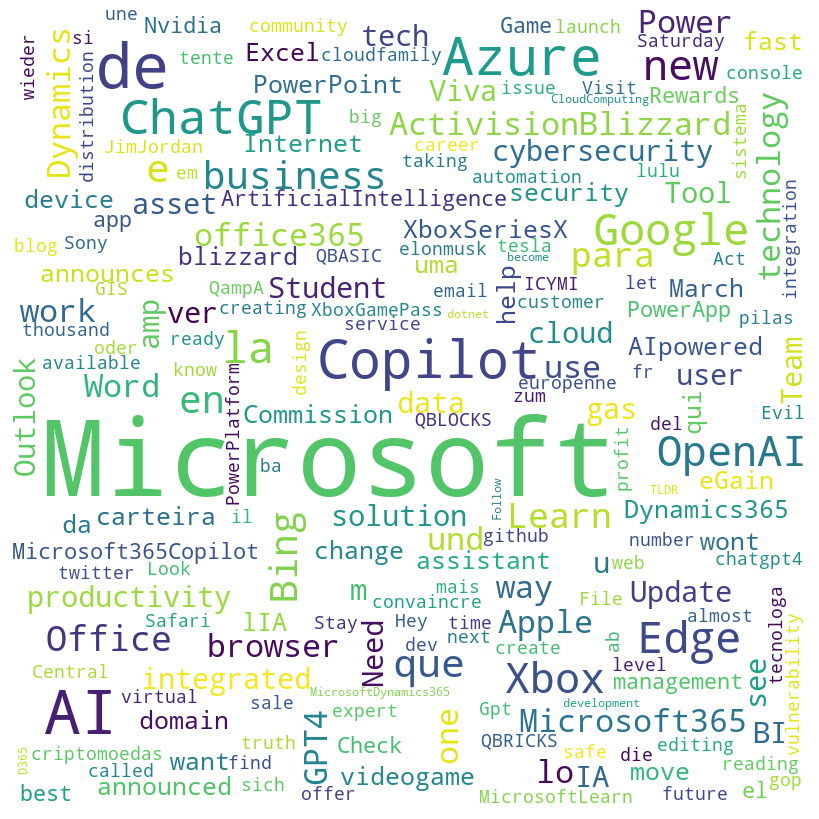

In [19]:
def generate_wordcloud(text): 

    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text) 

    return wordcloud 

text = ' '.join(df['Lemmatized content'].sum()) 

wordcloud = generate_wordcloud(text) 

import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 8), facecolor=None) 

plt.imshow(wordcloud) 

plt.axis("off") 

plt.tight_layout(pad=0) 

plt.show() 